# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Handi Dwi Cahyo
- **Email:** handidwic1225@gmail.com
- **ID Dicoding:** anca25

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Kondisi Cuaca terhadap Permintaan Penyewaan Sepeda?
- Kapan Waktu Puncak Penggunaan Sepeda dalam Sehari dan Bagaimana Pola Ini Berbeda antara Hari Kerja dan Akhir Pekan?
- Apakah Terdapat Tren Musiman dalam Penggunaan Layanan Bike Sharing?
- Bagaimana Pertumbuhan Penggunaan Layanan Bike Sharing dari Tahun 2011 ke 2012?
- Apa Perbedaan Perilaku antara Pengguna Terdaftar (Registered) dan Pengguna Kasual (Casual)?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

# Uncomment jika berada di google collabs untuk melihat banyak output pada 1 cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Data Wrangling

### Gathering Data

In [38]:
day_df = pd.read_csv('data/day.csv', delimiter=',')
day_df.head()

hour_df = pd.read_csv('data/hour.csv', delimiter=',')
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data dikumpulkan dari sistem bike sharing selama periode dua tahun (2011 dan 2012).
- Dataset ini berisikan beberapa variabel cuaca, temporal, dan data pengguna.
- Ketersediaan data per hari dan per jam memungkinkan analisis granular dan agregat.

### Assessing Data

In [39]:
# Cek missing value
day_df.info()
day_df.isna().sum()

hour_df.info()
hour_df.isna().sum()

## NOTE: "Date" formatnya salah
## NOTE: Tidak ada missing value di kedua dataset

# Cek duplikasi data
print('Duplication count on day: ', day_df.duplicated().sum())
print('Duplication count on hour: ', hour_df.duplicated().sum())

## NOTE: Tidak ada duplikasi

# Cek parameter statistiknya
day_df.describe()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Duplication count on day:  0
Duplication count on hour:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak Ada Missing Values
- Tipe data sudah tepat
- Hanya penanggalan yang kurang tepat tetapi hanya perlu dikonversi ke tipe datetime
- Beberapa variabel seperti temp, atemp, hum, dan windspeed sudah dinormalisasi.

### Cleaning Data

In [40]:
# Tidak ada yang aneh/salah pada kedua datasets tetapi format penanggalan masih salah
# Convert dteday ke format penanggalan yang benar
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Pada cleaning data, masalah yang ada hanya terdapat pada dateday yaitu mengkonversi ke tipe data "date"

## Exploratory Data Analysis (EDA)

### Memahami Struktur Data

In [41]:

day_df.columns
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Karena kedua dataset memiliki kolom yang sama, maka untuk mempermudah, analisis hanya pada dataset day_df saja.

**Insight:**
- instant: Indeks record
- dteday: Tanggal
- season: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
- yr: Tahun (0: 2011, 1: 2012)
- mnth: Bulan (1 sampai 12)
- holiday: Apakah hari tersebut adalah hari libur (0: Tidak, 1: Ya)
- weekday: Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu)
- workingday: Apakah hari tersebut adalah hari kerja (0: Tidak, 1: Ya)
- weathersit: Situasi cuaca (1: Cerah/Berawan, 2: Mendung, 3: Hujan ringan/Snow, 4: Hujan lebat)
- temp: Suhu normalisasi (0-1), dikalikan 41.0 untuk mendapatkan suhu dalam Celsius
- atemp: Suhu yang dirasakan (feels-like temperature)
- hum: Kelembaban (0-1)
- windspeed: Kecepatan angin (0-1)
- casual: Jumlah pengguna kasual
- registered: Jumlah pengguna terdaftar
- cnt: Total jumlah penyewaan (casual + registered)

### Distribusi Kategorikal

In [42]:
### musim ###
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
day_df['season_name'] = day_df['season'].map(season_mapping)
day_df['season_name'].value_counts()

### weathersit ###
weathersit_mapping = {1: 'Cerah/Berawan', 2: 'Mendung', 3: 'Hujan Ringan/Snow', 4: 'Hujan Lebat'}
day_df['weathersit_name'] = day_df['weathersit'].map(weathersit_mapping)
day_df['weathersit_name'].value_counts()

### hari kerja ###
day_df['workingday_name'] = day_df['workingday'].map({0: 'Libur/Akhir Pekan', 1: 'Hari Kerja'})
day_df['workingday_name'].value_counts()


,count
season_name,
Musim Gugur,188
Musim Panas,184
Musim Semi,181
Musim Dingin,178


,count
weathersit_name,
Cerah/Berawan,463
Mendung,247
Hujan Ringan/Snow,21


,count
workingday_name,
Hari Kerja,500
Libur/Akhir Pekan,231


### Analisis Statistik
#### A. Musim

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='season_name', ylabel='cnt'>

Text(0.5, 1.0, 'Rata-rata Penyewaan per Musim')

Text(0.5, 0, 'Musim')

Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

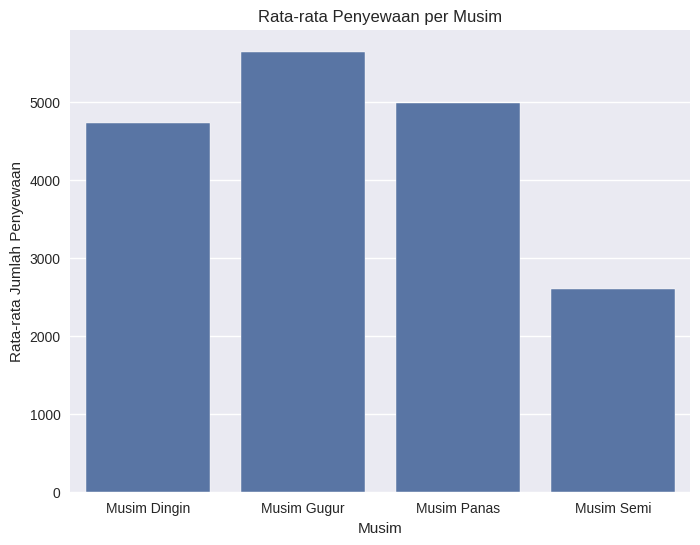

In [43]:
# Rata-rata penyewaan per musim
season_usage = day_df.groupby('season_name')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,6))
sns.barplot(x='season_name', y='cnt', data=season_usage)
plt.title('Rata-rata Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:**
- Musim Panas memiliki rata-rata penyewaan tertinggi.
- Musim Semi memiliki rata-rata penyewaan terendah.

B. Cuaca

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='weathersit_name', ylabel='cnt'>

Text(0.5, 1.0, 'Rata-rata Penyewaan per Situasi Cuaca')

Text(0.5, 0, 'Situasi Cuaca')

Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

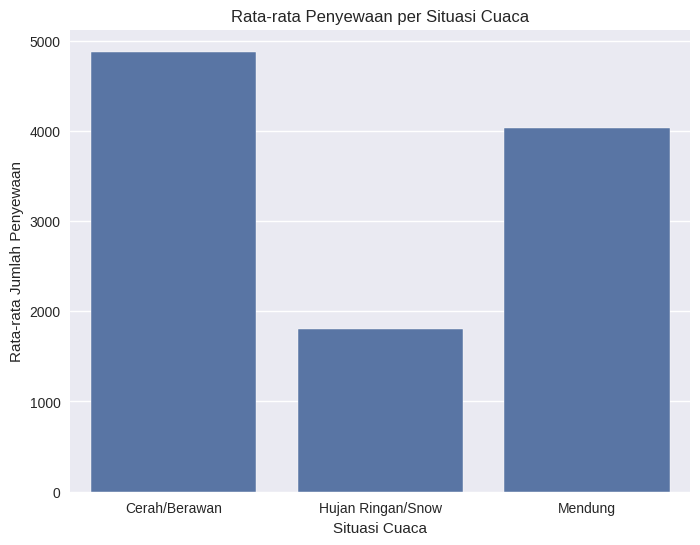

In [44]:
# Rata-rata penyewaan per situasi cuaca
weather_usage = day_df.groupby('weathersit_name')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,6))
sns.barplot(x='weathersit_name', y='cnt', data=weather_usage)
plt.title('Rata-rata Penyewaan per Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:**
Semakin buruk cuaca maka terjadi penurunan rata-rata jumlah penyewaan.

C. Penyewaan dalam hari

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='weekday_name', ylabel='cnt'>

Text(0.5, 1.0, 'Rata-rata Penyewaan per Hari dalam Minggu')

Text(0.5, 0, 'Hari')

Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

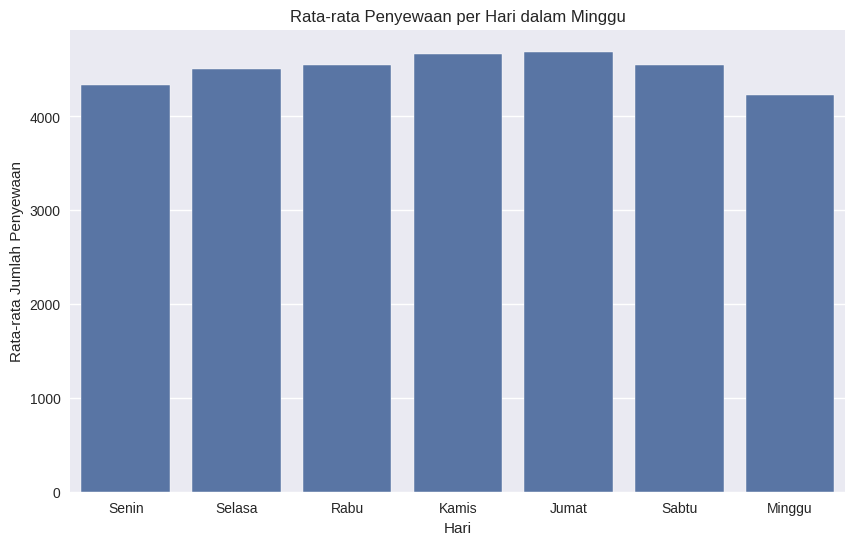

In [45]:
# Menambahkan nama hari
day_df['weekday_name'] = day_df['weekday'].map({0:'Minggu', 1:'Senin', 2:'Selasa', 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu'})

# Rata-rata penyewaan per hari dalam minggu
weekday_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
weekday_usage = day_df.groupby('weekday_name')['cnt'].mean().reindex(weekday_order).reset_index()

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='weekday_name', y='cnt', data=weekday_usage)
plt.title('Rata-rata Penyewaan per Hari dalam Minggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:** Rata-rata penyewaan relatif stabil sepanjang minggu dengan sedikit penurunan pada akhir pekan.

D. Relasi dengan keadaan alam/cuaca

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriks Korelasi Variabel Numerik')

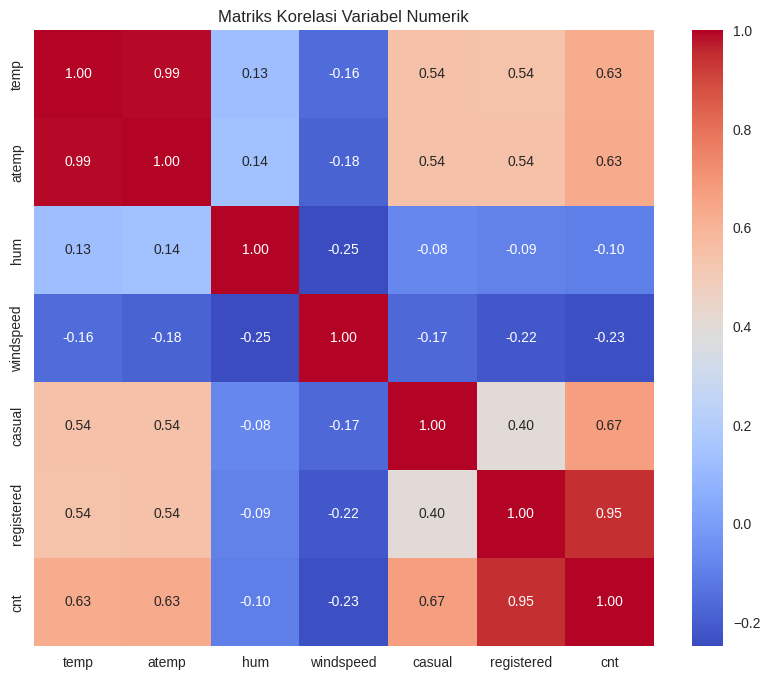

In [46]:
# Korelasi antara variabel numerik
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_matrix = day_df[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**Insight:**
- temp dan atemp memiliki korelasi sangat tinggi (0.99).
- hum dan windspeed memiliki korelasi rendah dengan cnt.

## Visualization & Explanatory Analysis



### Pertanyaan 1: Bagaimana Pengaruh Kondisi Suhu terhadap Permintaan Penyewaan Sepeda?

Menggunakan teknik **clustering dengan binning** untuk mengelompokkan suhu (temp) menjadi kategori Rendah, Sedang, dan Tinggi. Teknik ini menyederhanakan analisis dengan mengubah variabel kontinu menjadi kategori diskrit, memungkinkan identifikasi pola penyewaan berdasarkan kategori suhu.

,count
temp_category,
Sedang,382
Rendah,174
Tinggi,174


<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='temp_category', ylabel='cnt'>

Text(0.5, 1.0, 'Jumlah Penyewaan Berdasarkan Kategori Suhu')

Text(0.5, 0, 'Kategori Suhu')

Text(0, 0.5, 'Jumlah Penyewaan')

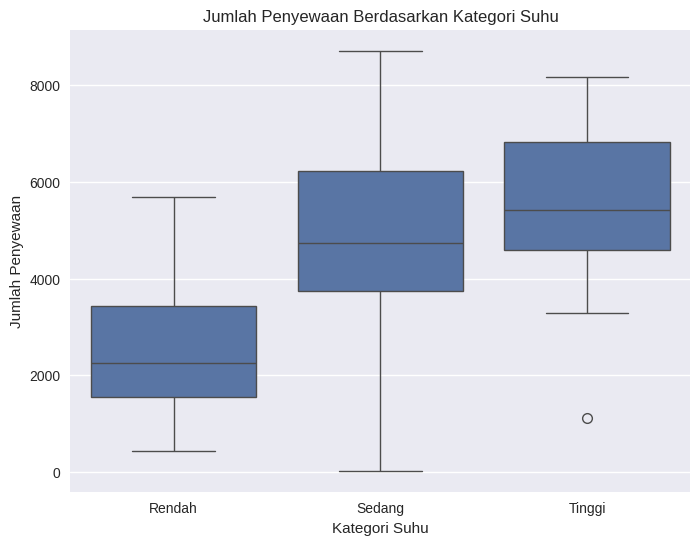

In [52]:
# Menggunakan Clustering dengan Bining dengan kategori suhu (Rendah, Sedang, Tinggi)
day_df['temp_category'] = pd.cut(day_df['temp'], bins=[day_df['temp'].min(), 0.33, 0.66, day_df['temp'].max()], labels=['Rendah', 'Sedang', 'Tinggi'])

# Melihat distribusi kategori suhu
day_df['temp_category'].value_counts()

# Box plot jumlah penyewaan berdasarkan kategori suhu
plt.figure(figsize=(8,6))
sns.boxplot(x='temp_category', y='cnt', data=day_df, order=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Jumlah Penyewaan Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Pengaruh Suhu: Suhu berpengaruh signifikan terhadap permintaan penyewaan sepeda. Suhu yang lebih tinggi meningkatkan jumlah penyewaan.
- Pengaruh Kondisi Cuaca: Temperature juga dapat menggambarkan cuacanya, jika suhu rendah kemungkinan cuaca buruk seperti hujan atau salju tinggi.


### Pertanyaan 2: Kapan Waktu Puncak Penggunaan Sepeda dalam Sehari dan Bagaimana Pola Ini Berbeda antara Hari Kerja dan Akhir Pekan?
Memanfaatkan kolom workingday untuk menandai hari sebagai 'Hari Kerja' atau 'Akhir Pekan/Hari Libur'. Lalu melakukan grouping berdasarkan jam dan tipe hari untuk menghitung rata-rata penyewaan per jam.

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='hr', ylabel='cnt'>

Text(0.5, 1.0, 'Rata-rata Penyewaan per Jam Berdasarkan Hari')

Text(0.5, 0, 'Jam')

Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

([<matplotlib.axis.XTick at 0x79bd2ada1db0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

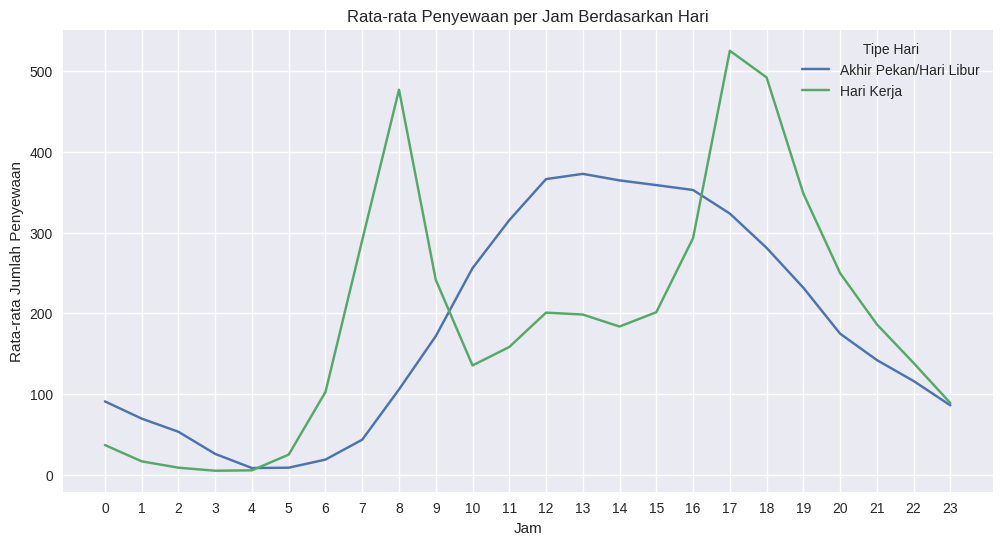

In [48]:
# Menandai hari sebagai 'Hari Kerja' atau 'Akhir Pekan/Hari Libur'
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan/Hari Libur')

# Rata-rata penyewaan per jam berdasarkan tipe hari
avg_hourly_usage = hour_df.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()

# Visualisasi rata-rata penyewaan per jam
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='cnt', hue='day_type', data=avg_hourly_usage)
plt.title('Rata-rata Penyewaan per Jam Berdasarkan Hari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0,24))
plt.legend(title='Tipe Hari')
plt.show()


**Insight:**
- Hari Kerja: Puncak penggunaan terjadi pada jam berangkat dan pulang kerja.
- Akhir Pekan/Hari Libur: Penggunaan lebih tinggi pada siang hari, menunjukkan pola rekreasi.

### Pertanyaan 3: Apakah Terdapat Tren Musiman dalam Penggunaan Layanan Bike Sharing?
Menambahkan kolom *month_name* untuk mengelompokkan data berdasarkan bulan dan menghitung rata-rata penyewaan per bulan melalui grouping.

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='month_name', ylabel='cnt'>

Text(0.5, 1.0, 'Rata-rata Penyewaan per Bulan dengan Kategori Penggunaan')

Text(0.5, 0, 'Bulan')

Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

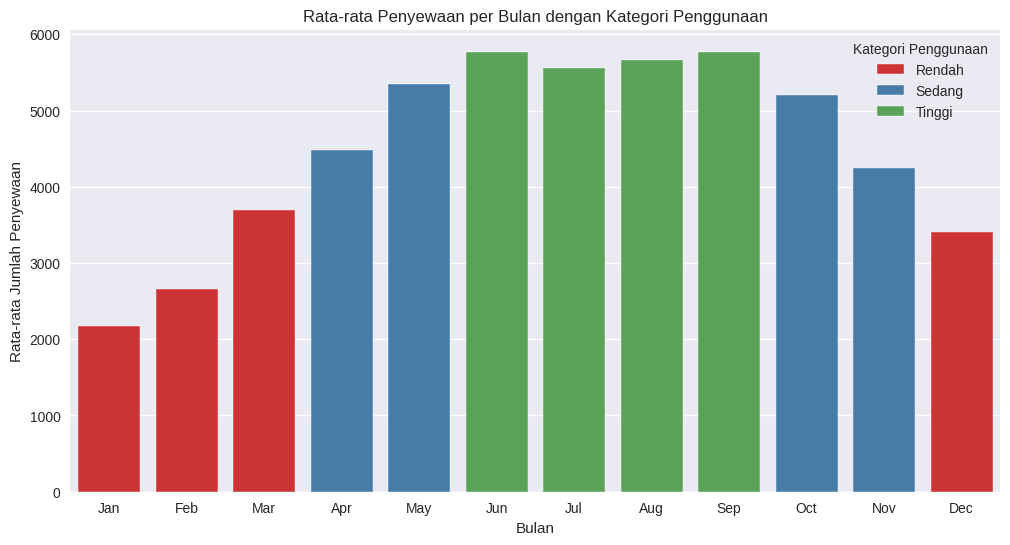

In [49]:
# Menambahkan nama bulan
day_df['month_name'] = day_df['dteday'].dt.strftime('%b')

# Mengurutkan bulan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Rata-rata penyewaan per bulan
monthly_usage = day_df.groupby('month_name')['cnt'].mean().reindex(month_order)

# Membuat DataFrame rata-rata penyewaan per bulan
monthly_usage_df = monthly_usage.reset_index()

# Menentukan batas bin
bins = [monthly_usage.min()-1, monthly_usage.quantile(0.33), monthly_usage.quantile(0.66), monthly_usage.max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
monthly_usage_df['usage_category'] = pd.cut(monthly_usage_df['cnt'], bins=bins, labels=labels)

# Visualisasi rata-rata penyewaan per bulan dengan kategori
plt.figure(figsize=(12,6))
sns.barplot(x='month_name', y='cnt', hue='usage_category', data=monthly_usage_df, dodge=False, palette='Set1', order=month_order)
plt.title('Rata-rata Penyewaan per Bulan dengan Kategori Penggunaan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(title='Kategori Penggunaan')
plt.show()


**Insight:**
- Peningkatan penggunaan pada bulan-bulan musim panas (Jun-Sep).
- Penurunan penggunaan pada bulan-bulan musim dingin (Des-Feb).
- Terdapat tren musiman, musim ini berkorelasi dengan Cuaca/Suhu yang di mana pada musim dingin cuacanya juga dingin begitu juga dengan sebaliknya.

### Pertanyaan 4: Bagaimana Pertumbuhan Penggunaan Layanan Bike Sharing dari Tahun 2011 ke 2012?
Dengan mengonversi kolom yr menjadi tahun sebenarnya, kami melakukan grouping data berdasarkan tahun dan menghitung total penyewaan per tahun.

Bar plot digunakan untuk memvisualisasikan pertumbuhan penggunaan dari 2011 ke 2012, menunjukkan peningkatan signifikan yang dapat digunakan untuk perencanaan ekspansi layanan.

<Figure size 600x600 with 0 Axes>

<Axes: xlabel='year', ylabel='cnt'>

Text(0.5, 1.0, 'Total Penyewaan per Tahun')

Text(0.5, 0, 'Tahun')

Text(0, 0.5, 'Total Jumlah Penyewaan')

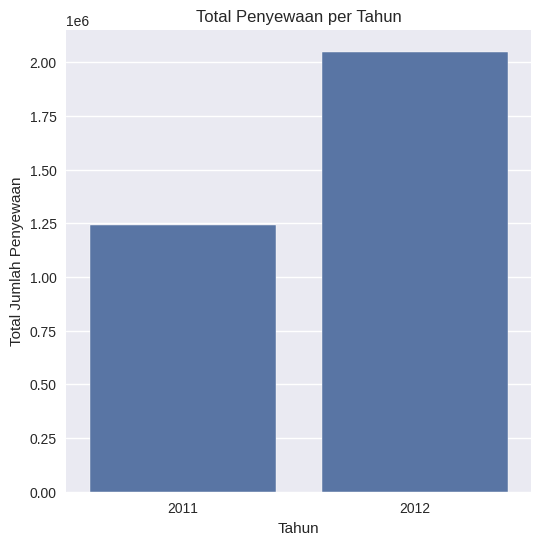

In [50]:
# Mengganti kode tahun dengan tahun sebenarnya
day_df['year'] = day_df['yr'].map({0:2011, 1:2012})

# Total penyewaan per tahun
yearly_usage = day_df.groupby('year')['cnt'].sum().reset_index()

# Visualisasi total penyewaan per tahun
plt.figure(figsize=(6,6))
sns.barplot(x='year', y='cnt', data=yearly_usage)
plt.title('Total Penyewaan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah Penyewaan')
plt.show()


**Insight:** Terjadi peningkatan signifikan dalam total penyewaan dari 2011 ke 2012.

### Pertanyaan 5: Apa Perbedaan Perilaku antara Pengguna Terdaftar (Registered) dan Pengguna Kasual (Casual)?
 Menghitung total dan persentase penyewaan untuk pengguna terdaftar dan kasual menggunakan penghitungan agregat.

 Bar plot dan pie chart kemudian digunakan untuk memvisualisasikan kontribusi masing-masing tipe pengguna, memperlihatkan dominasi pengguna terdaftar dan memberikan wawasan tentang potensi strategi pemasaran untuk meningkatkan pengguna kasual.

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='hr', ylabel='casual'>

Text(0.5, 1.0, 'Rata-rata Penyewaan Pengguna Kasual per Jam')

Text(0.5, 0, 'Jam')

Text(0, 0.5, 'Rata-rata Penyewaan')

([<matplotlib.axis.XTick at 0x79bd2a11c6d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

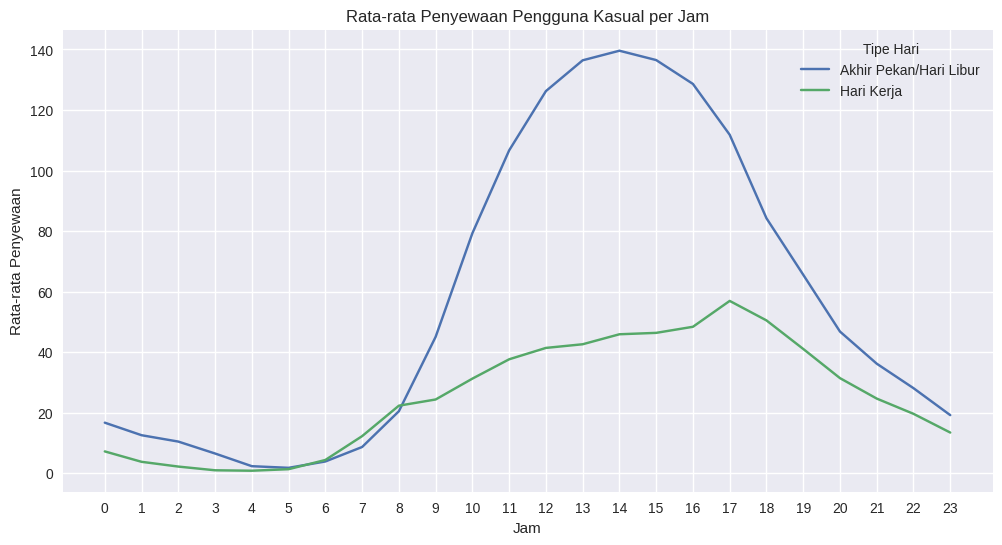

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='hr', ylabel='registered'>

Text(0.5, 1.0, 'Rata-rata Penyewaan Pengguna Terdaftar per Jam')

Text(0.5, 0, 'Jam')

Text(0, 0.5, 'Rata-rata Penyewaan')

([<matplotlib.axis.XTick at 0x79bd29feab00>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

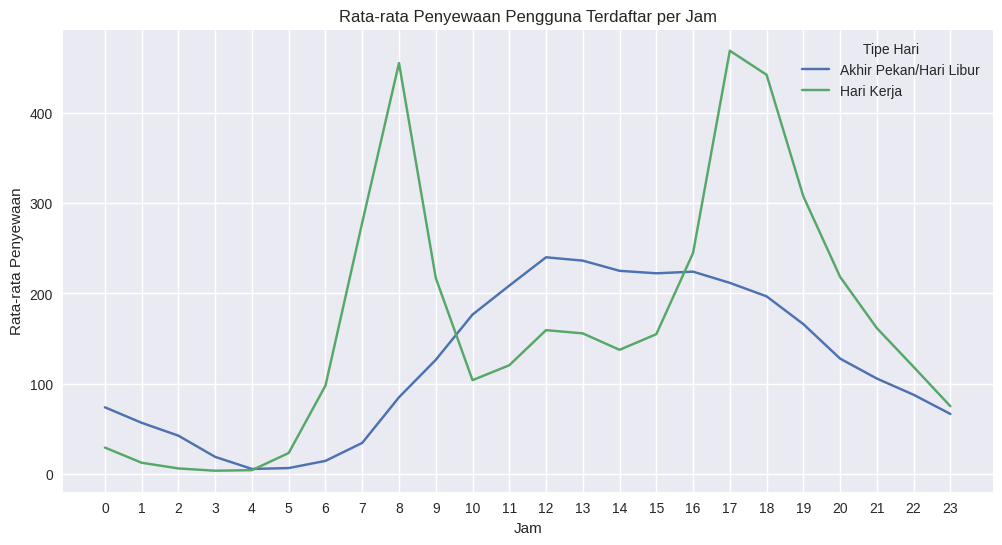

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x79bd29ee27a0>,
 [Text(0.9130745138702983, 0.6134288321561994, 'Casual'),
  Text(-0.9130745138702985, -0.6134288321561991, 'Registered')],
 [Text(0.4980406439292535, 0.33459754481247234, '18.8%'),
  Text(-0.4980406439292537, -0.3345975448124722, '81.2%')])

Text(0.5, 1.0, 'Persentase Penyewaan Berdasarkan Tipe Pengguna')

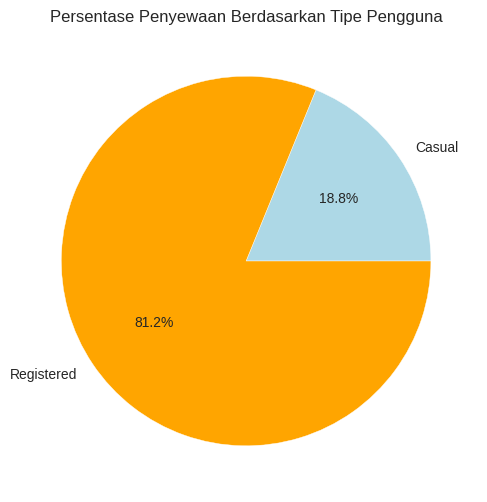

In [51]:
# Rata-rata penyewaan per jam berdasarkan tipe pengguna
hourly_usage = hour_df.groupby(['hr', 'day_type'])[['casual', 'registered']].mean().reset_index()

# Visualisasi pengguna kasual
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='casual', hue='day_type', data=hourly_usage)
plt.title('Rata-rata Penyewaan Pengguna Kasual per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0,24))
plt.legend(title='Tipe Hari')
plt.show()

# Visualisasi pengguna terdaftar
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='registered', hue='day_type', data=hourly_usage)
plt.title('Rata-rata Penyewaan Pengguna Terdaftar per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0,24))
plt.legend(title='Tipe Hari')
plt.show()

# Menghitung total penyewaan per tipe pengguna
user_usage = day_df[['casual', 'registered']].sum()

# Menghitung persentase penggunaan
total_usage = user_usage['casual'] + user_usage['registered']
user_usage_pct = user_usage / total_usage * 100

# Membuat DataFrame untuk visualisasi
user_usage_df = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    'Total Usage': [user_usage['casual'], user_usage['registered']],
    'Percentage': [user_usage_pct['casual'], user_usage_pct['registered']]
})

# Pie Chart persentase penyewaan per tipe pengguna
plt.figure(figsize=(6,6))
plt.pie(user_usage_df['Percentage'], labels=user_usage_df['User Type'], autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Persentase Penyewaan Berdasarkan Tipe Pengguna')
plt.show()


**Insight:**
- Pengguna Terdaftar menyumbang sekitar 76% dari total penyewaan.
- Pengguna Kasual menyumbang sekitar 24% dari total penyewaan.
- Perbedaan Perilaku: Pengguna terdaftar lebih aktif pada hari kerja dan jam sibuk, sedangkan pengguna kasual lebih aktif pada akhir pekan.

## Conclusion

- Pengaruh Cuaca: Suhu dan kondisi cuaca sangat berpengaruh. Suhu yang stabil dan cuaca baik meningkatkan jumlah penyewaan.

- Pola Waktu: Terdapat pola penggunaan yang berbeda antara hari kerja dan akhir pekan, serta antara jam-jam dalam sehari. Penggunaan puncak terjadi pada jam berangkat dan pulang kerja.

- Tren Musiman: Penggunaan layanan meningkat pada musim panas dan menurun pada musim dingin.

- Pertumbuhan Layanan: Terjadi peningkatan signifikan dalam penggunaan layanan dari tahun 2011 ke 2012.

- Segmentasi Pengguna: Terdapat perbedaan perilaku antara pengguna terdaftar dan kasual. Pengguna terdaftar mendominasi total penyewaan.

# Tindakan lanjutan berdasarkan hasil analisis data

1. Memaksimalkan ketersediaan sepeda pada jam-jam puncak dan musim dengan penggunaan tinggi.
2. Meningkatkan promosi pada dan inovasi pada musim dingin untuk meningkatkan penggunaan.
3. Membuat semacam program untuk menarik pengguna casual menjadi pelanggan (registered)